# 📊 Análise Exploratória de Dados de da Rede Sonda 🌦️

## 📌 Introdução
Este notebook realiza uma análise exploratória dos dados meteorológicos coletados de diversas estações. O objetivo é entender a estrutura dos dados, avaliar sua qualidade e identificar padrões relevantes.

## 📂 Fonte dos Dados
- Arquivos CSV formatados armazenados no ftp
- Contêm medições de variáveis meteorológicas, solarimétricas e cameras.

## 🔍 Objetivos da Análise
1. **Carregar e explorar os dados**: verificar onde os dados estão armazenados, seu formato e estrutura.
2. **Dimensionamento e variáveis disponíveis**: entender o tamanho dos arquivos, número de registros e colunas.
3. **Análise temporal dos dados disponíveis**: identificar o período coberto e eventuais lacunas temporais.
4. **Visualização da distribuição espacial das estações**: verificar a abrangência geográfica das medições.
5. **Exploração inicial de distribuições**: histogramas e estatísticas básicas das variáveis.
6. **Análise de qualidade dos dados** *(última etapa)*: identificar valores ausentes, inconsistências e flags de qualidade.

### 1. Carregar e Explorar os Dados
Vamos começar listando o tamanho da base de dados que estão no diretório do ftp.

In [1]:
# Diretório onde os arquivos estão localizados
DIRETORIO = '/media/helvecioneto/Barracuda/sonda/'

In [2]:
# Exibe o tamanho de cada arquivo no diretório ordenado por tamanho de forma decrescente
!du -h --max-depth=1 {DIRETORIO + "novos_formatados/"} | sort -rh

18G	/media/helvecioneto/Barracuda/sonda/novos_formatados/
1,8G	/media/helvecioneto/Barracuda/sonda/novos_formatados/PMA
1,7G	/media/helvecioneto/Barracuda/sonda/novos_formatados/PTR
1,6G	/media/helvecioneto/Barracuda/sonda/novos_formatados/SMS
1,4G	/media/helvecioneto/Barracuda/sonda/novos_formatados/CPA
1,2G	/media/helvecioneto/Barracuda/sonda/novos_formatados/BRB
1,1G	/media/helvecioneto/Barracuda/sonda/novos_formatados/ORN
989M	/media/helvecioneto/Barracuda/sonda/novos_formatados/FLN
848M	/media/helvecioneto/Barracuda/sonda/novos_formatados/CGR
837M	/media/helvecioneto/Barracuda/sonda/novos_formatados/CTS
759M	/media/helvecioneto/Barracuda/sonda/novos_formatados/JOI
749M	/media/helvecioneto/Barracuda/sonda/novos_formatados/NAT
686M	/media/helvecioneto/Barracuda/sonda/novos_formatados/SLZ
547M	/media/helvecioneto/Barracuda/sonda/novos_formatados/MDS
521M	/media/helvecioneto/Barracuda/sonda/novos_formatados/STM
464M	/media/helvecioneto/Barracuda/sonda/novos_formatados/SBR
445M	/media/

Existem 3 tipos de dados:
- Dados Meteorológicos
- Dados Solarimétricos
- Dados Anemometricos

Abaixo vamos adicionar cada tipo de dado em uma lista para facilitar a análise.

Utilizaremos a biblioteca duckdb para realizar a análise dos dados. DuckDB funciona como um banco de dados SQL, mas em memória, o que facilita a análise de grandes volumes de dados.

In [3]:
# Importar a biblioteca DuckDB para manipulação de dados
import os
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Apontar o caminho das bases de dados
ARQV_METEOROLOGICO = DIRETORIO + 'dados_meteorologicos.parquet'
ARQV_SOLARIMETRICA = DIRETORIO + 'dados_solarimetricos.parquet'
ARQV_ANEMOMETRICO = DIRETORIO + 'dados_anemometricos.parquet'

# Nome das tabelas
BASE_METEOROLOGICO = 'base_meteorologica'
BASE_SOLARIMETRICA = 'base_solarimetrica'
BASE_ANEMOMETRICO = 'base_anemometrica'

In [5]:
# Cria variavel para conexão do banco de dados
global con
con = duckdb.connect(database=':memory:')
!rm -rf .tmp

In [6]:
# Cria as tabelas no banco de dados DuckDB a partir dos arquivos Parquet
con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_METEOROLOGICO} AS \
            SELECT * FROM read_parquet('{ARQV_METEOROLOGICO}')""")

con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_SOLARIMETRICA} AS \
            SELECT * FROM read_parquet('{ARQV_SOLARIMETRICA}')""")

con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_ANEMOMETRICO} AS \
            SELECT * FROM read_parquet('{ARQV_ANEMOMETRICO}')""")

In [7]:
# Exibe as primeiras linhas da tabela meteorológica
display(con.execute(f"SELECT * FROM {BASE_METEOROLOGICO} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,tp_sfc,humid_sfc,press,rain,ws10_avg,ws10_std,wd10_avg,wd10_std
0,FLN,2019-03-01 00:00:00,2019,60,0,22.379999,97.699997,1010.283997,0.72,5.2698,0.923294,23.422167,4.079195
1,FLN,2019-03-01 00:10:00,2019,60,10,21.219999,101.099998,1010.502991,0.00,4.6318,0.352908,29.199734,1.963143
2,FLN,2019-03-01 00:20:00,2019,60,20,21.150000,101.099998,1010.476013,0.18,3.9738,0.713510,33.528019,2.825004
3,FLN,2019-03-01 00:30:00,2019,60,30,21.080000,101.099998,1010.473999,0.00,3.1440,0.646525,22.548946,3.690781
4,FLN,2019-03-01 00:40:00,2019,60,40,21.200001,101.099998,1010.629028,0.00,0.8769,0.440114,58.076206,8.977480


In [8]:
# Exibe as primeiras linhas da tabela anemométrica
display(con.execute(f"SELECT * FROM {BASE_SOLARIMETRICA} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,lw_calc_min,lw_raw_avg,lw_raw_std,lw_raw_max,lw_raw_min,tp_glo,tp_dir,tp_dif,tp_lw_dome,tp_lw_case
0,FLN,2019-04-01 00:00:00,2019,91,0,-1.786,0.135,-1.397,-2.196,-2.651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FLN,2019-04-01 00:01:00,2019,91,1,-1.808,0.124,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FLN,2019-04-01 00:02:00,2019,91,2,-1.815,0.145,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FLN,2019-04-01 00:03:00,2019,91,3,-1.800,0.136,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FLN,2019-04-01 00:04:00,2019,91,4,-1.797,0.163,-1.397,-2.196,-2.666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Exibe as primeiras linhas da tabela solarimétrica
display(con.execute(f"SELECT * FROM {BASE_ANEMOMETRICO} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,ws10_avg,ws10_std,ws10_min,ws10_max,wd10_avg,...,wd25_avg,wd25_std,tp_25,ws50_avg,ws50_std,ws50_min,ws50_max,wd50_avg,wd50_std,tp_50
0,ORN,2021-01-01 00:00:00,-5555,1,-5555,3.036001,0.692576,1.43,4.90,340.277008,...,338.134003,11.51842,21.500050,3.973298,-5555.0,2.33,6.32,344.615692,9.944590,21.351320
1,ORN,2021-01-01 00:10:00,-5555,1,-5555,3.063534,0.634577,1.85,4.74,342.141602,...,342.613007,10.23149,21.540030,4.155813,-5555.0,2.85,6.18,347.026886,9.513543,21.391270
2,ORN,2021-01-01 00:20:00,-5555,1,-5555,3.067666,0.664677,1.74,4.78,347.539215,...,346.913208,10.26602,21.526489,3.938734,-5555.0,2.07,5.82,352.226288,8.289485,21.364031
3,ORN,2021-01-01 00:30:00,-5555,1,-5555,2.389133,0.479149,1.13,3.98,351.191895,...,348.663391,10.63647,21.368370,3.494213,-5555.0,2.23,5.37,353.262604,7.491448,21.194250
4,ORN,2021-01-01 00:40:00,-5555,1,-5555,2.308198,0.641427,0.97,4.39,338.063690,...,339.783508,10.89829,21.061411,3.401835,-5555.0,1.62,5.32,345.010986,8.325338,20.832430


In [21]:
def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('year', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()

In [22]:
# Verifica se os dados são temporais
temporal_solar = verifica_temporal(BASE_SOLARIMETRICA)
temporal_anemo = verifica_temporal(BASE_ANEMOMETRICO)
temporal_meteo = verifica_temporal(BASE_METEOROLOGICO)

In [26]:
def plot_tempora(df, titulo):
    df["year"] = df["data"].dt.year
    df["month"] = df["data"].dt.month
    df = df.dropna(subset=["year"])
    df["year"] = df["year"].astype(int)
    # Reagrupando os dados para evitar duplicatas ao pivotar
    df_grouped = df.groupby(["acronym", "year"])["registros"].sum().reset_index()
    # Criando a matriz pivot corrigida
    heatmap_data = df_grouped.pivot(index="acronym", columns="year", values="registros")
    # Criando a figura
    plt.figure(figsize=(8, max(4, len(heatmap_data) * 0.2)))  # Ajusta dinamicamente o tamanho
    sns.heatmap(heatmap_data, cmap="coolwarm_r", linewidths=0.5, linecolor="gray", 
                cbar_kws={'label': 'Número de Registros'}, annot=False)
    # Ajustando o gráfico
    plt.title(titulo)
    plt.xlabel("Ano")
    plt.ylabel("Estação")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

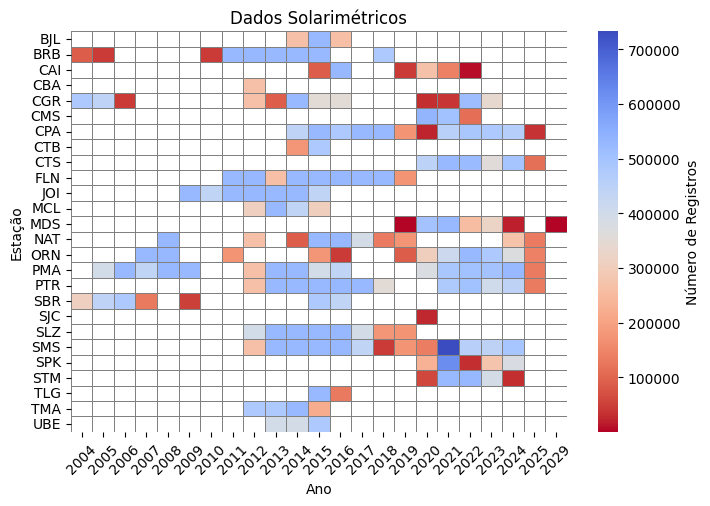

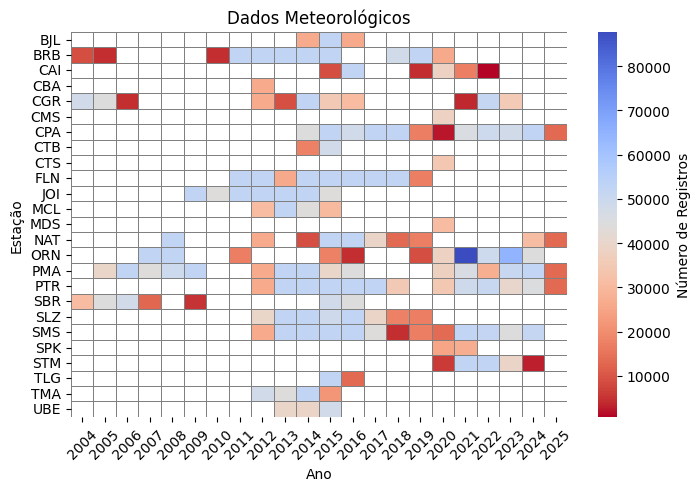

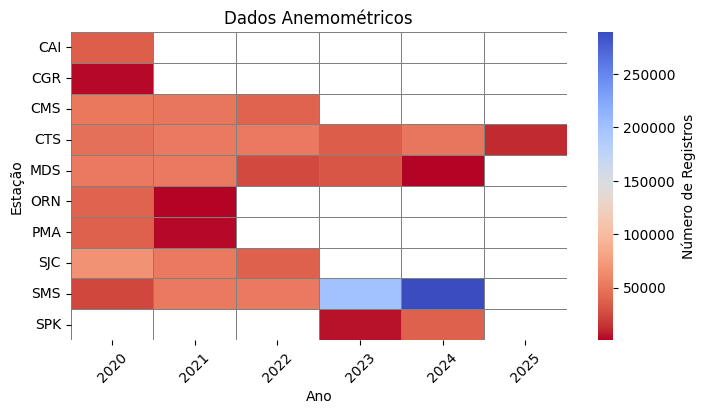

In [27]:
plot_tempora(temporal_solar, 'Dados Solarimétricos')
plot_tempora(temporal_meteo, 'Dados Meteorológicos')
plot_tempora(temporal_anemo, 'Dados Anemométricos')

Verificando os dados a partir de consultas SQL.

In [ ]:
# Peque os dados da solarimetricos da estacao NAT que contem o ano maior que 2024
con.execute(f"""
SELECT * FROM {BASE_SOLARIMETRICA} WHERE acronym = 'MDS' AND EXTRACT(YEAR FROM timestamp) > 2025
""").fetch_df() 

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,lw_calc_min,lw_raw_avg,lw_raw_std,lw_raw_max,lw_raw_min,tp_glo,tp_dir,tp_dif,tp_lw_dome,tp_lw_case
0,MDS,2029-09-04 17:33:00,-5555,247,-5555,681.827576,0.0,681.827576,681.827576,684.417175,...,-5555.0,-5555.0,-5555.0,-5555.0,-5555.0,-5555.0,20.817169,-5555.0,-5555.0,-5555.0


In [14]:
# Pega apenas colunas de dados meteorológicos
colunas_meteoro = con.execute(f"SELECT * FROM {BASE_METEOROLOGICO} LIMIT 1").description
colunas_meteoro = [c[0] for c in colunas_meteoro[5:]]
print(f"Colunas de dados meteorológicos: {colunas_meteoro}")

# Pega apenas colunas de dados solarimétricos
colunas_solar = con.execute(f"SELECT * FROM {BASE_SOLARIMETRICA} LIMIT 1").description
colunas_solar = [c[0] for c in colunas_solar[5:]]
print(f"Colunas de dados solarimétricos: {colunas_solar}")

# Pega apenas colunas de dados anemométricos
colunas_anemo = con.execute(f"SELECT * FROM {BASE_ANEMOMETRICO} LIMIT 1").description
colunas_anemo = [c[0] for c in colunas_anemo[5:]]
print(f"Colunas de dados anemométricos: {colunas_anemo}")

Colunas de dados meteorológicos: ['tp_sfc', 'humid_sfc', 'press', 'rain', 'ws10_avg', 'ws10_std', 'wd10_avg', 'wd10_std']
Colunas de dados solarimétricos: ['glo_avg', 'glo_std', 'glo_max', 'glo_min', 'dif_avg', 'dif_std', 'dif_max', 'dif_min', 'par_avg', 'par_std', 'par_max', 'par_min', 'lux_avg', 'lux_std', 'lux_max', 'lux_min', 'dir_avg', 'dir_std', 'dir_max', 'dir_min', 'lw_calc_avg', 'lw_calc_std', 'lw_calc_max', 'lw_calc_min', 'lw_raw_avg', 'lw_raw_std', 'lw_raw_max', 'lw_raw_min', 'tp_glo', 'tp_dir', 'tp_dif', 'tp_lw_dome', 'tp_lw_case']
Colunas de dados anemométricos: ['ws10_avg', 'ws10_std', 'ws10_min', 'ws10_max', 'wd10_avg', 'wd10_std', 'ws25_avg', 'ws25_std', 'ws25_min', 'ws25_max', 'wd25_avg', 'wd25_std', 'tp_25', 'ws50_avg', 'ws50_std', 'ws50_min', 'ws50_max', 'wd50_avg', 'wd50_std', 'tp_50']


In [15]:
def verificar_dados_invalidos(base, colunas): 
    query = f"""
    SELECT acronym, COUNT(*) AS total_dados,
    """
    # Para cada coluna em colunas_meteoro, criamos a parte do "dados_invalidos"
    for i, coluna in enumerate(colunas):
        query += f"""
        SUM(CASE WHEN \"{coluna}\" = 3333.0 THEN 1 ELSE 0 END) AS {coluna}_3333,
        SUM(CASE WHEN \"{coluna}\" = -5555.0 THEN 1 ELSE 0 END) AS {coluna}_minus_5555,
        """
    # Remover a última vírgula da consulta
    query = query.rstrip(",\n")
    # Adiciona a parte do FROM e GROUP BY
    query += f"""
    FROM \"{base}\"
    GROUP BY acronym
    """
    # Executar a query
    df = con.execute(query).fetch_df()
    return df

In [16]:
verificar_dados_invalidos(BASE_METEOROLOGICO, colunas_meteoro)

,acronym,total_dados,tp_sfc_3333,tp_sfc_minus_5555,humid_sfc_3333,humid_sfc_minus_5555,press_3333,press_minus_5555,rain_3333,rain_minus_5555,ws10_avg_3333,ws10_avg_minus_5555,ws10_std_3333,ws10_std_minus_5555,wd10_avg_3333,wd10_avg_minus_5555,wd10_std_3333,wd10_std_minus_5555
0,TLG,65664,3627.0,0.0,3627.0,0.0,3627.0,0.0,0.0,65664.0,0.0,65664.0,0.0,65664.0,0.0,65664.0,0.0,65664.0
1,STM,153244,0.0,21.0,0.0,153244.0,0.0,1.0,0.0,0.0,0.0,2042.0,0.0,2082.0,0.0,2042.0,0.0,2042.0
2,CGR,341239,34317.0,14.0,34317.0,90679.0,34317.0,0.0,21008.0,118487.0,34317.0,1920.0,34317.0,1932.0,34317.0,1920.0,34320.0,1920.0
3,MDS,30654,0.0,1.0,0.0,30654.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SMS,515446,26949.0,0.0,22509.0,213046.0,22476.0,0.0,22479.0,0.0,23129.0,213046.0,23129.0,213046.0,22480.0,0.0,22480.0,0.0
5,CTB,65664,5705.0,0.0,5705.0,0.0,5705.0,0.0,0.0,65664.0,5987.0,0.0,5987.0,0.0,5705.0,0.0,5705.0,0.0
6,TMA,166176,7354.0,0.0,7354.0,0.0,7354.0,0.0,0.0,135468.0,0.0,135468.0,0.0,135468.0,0.0,135468.0,0.0,135468.0
7,PMA,679980,55995.0,1.0,55689.0,227266.0,55687.0,0.0,55687.0,0.0,55942.0,42.0,55942.0,6.0,55687.0,42.0,55687.0,42.0
8,SLZ,320469,9199.0,0.0,9199.0,0.0,9199.0,0.0,0.0,298436.0,9199.0,0.0,9199.0,0.0,9199.0,0.0,9199.0,0.0
9,FLN,411552,18812.0,0.0,18810.0,0.0,18801.0,0.0,18801.0,0.0,42172.0,8784.0,42172.0,8784.0,16906.0,8784.0,16906.0,8784.0


In [17]:
verificar_dados_invalidos(BASE_SOLARIMETRICA, colunas_solar)

,acronym,total_dados,glo_avg_3333,glo_avg_minus_5555,glo_std_3333,glo_std_minus_5555,glo_max_3333,glo_max_minus_5555,glo_min_3333,glo_min_minus_5555,...,tp_glo_3333,tp_glo_minus_5555,tp_dir_3333,tp_dir_minus_5555,tp_dif_3333,tp_dif_minus_5555,tp_lw_dome_3333,tp_lw_dome_minus_5555,tp_lw_case_3333,tp_lw_case_minus_5555
0,SBR,2330357,394703.0,0.0,392358.0,0.0,392341.0,0.0,394704.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CPA,4621487,61813.0,100806.0,61813.0,100806.0,61791.0,100806.0,61791.0,100806.0,...,0.0,1948847.0,0.0,0.0,0.0,1948847.0,0.0,1948847.0,0.0,237443.0
2,BRB,3287520,355789.0,0.0,354468.0,0.0,355781.0,0.0,355789.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UBE,1270080,197516.0,0.0,197516.0,0.0,197516.0,0.0,197516.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CMS,1153432,0.0,28.0,0.0,28.0,0.0,28.0,0.0,28.0,...,0.0,1153432.0,0.0,3.0,0.0,1153432.0,0.0,1153432.0,0.0,1153432.0
5,BJL,1051200,137063.0,0.0,137063.0,0.0,121013.0,0.0,121013.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,CAI,1071879,73906.0,0.0,73906.0,0.0,73906.0,0.0,73906.0,0.0,...,0.0,413799.0,0.0,0.0,0.0,413799.0,0.0,413799.0,0.0,234847.0
7,TLG,656640,36263.0,0.0,36263.0,0.0,36261.0,0.0,36261.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,STM,1533685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1533685.0,0.0,0.0,0.0,1533685.0,0.0,1533685.0,0.0,0.0
9,MDS,1624506,0.0,295.0,0.0,295.0,0.0,295.0,0.0,295.0,...,0.0,1624506.0,0.0,4.0,0.0,1624506.0,0.0,1624506.0,0.0,1624506.0


In [18]:
verificar_dados_invalidos(BASE_ANEMOMETRICO, colunas_anemo)

,acronym,total_dados,ws10_avg_3333,ws10_avg_minus_5555,ws10_std_3333,ws10_std_minus_5555,ws10_min_3333,ws10_min_minus_5555,ws10_max_3333,ws10_max_minus_5555,...,ws50_min_3333,ws50_min_minus_5555,ws50_max_3333,ws50_max_minus_5555,wd50_avg_3333,wd50_avg_minus_5555,wd50_std_3333,wd50_std_minus_5555,tp_50_3333,tp_50_minus_5555
0,CAI,36434,0.0,36434.0,0.0,36434.0,0.0,36434.0,0.0,36434.0,...,0.0,36434.0,0.0,36434.0,0.0,36434.0,0.0,36434.0,0.0,36434.0
1,PMA,40067,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40067.0,0.0,40067.0,0.0,40067.0,0.0,40067.0,0.0,40067.0
2,SMS,618267,0.0,2167.0,0.0,618267.0,0.0,2167.0,0.0,2167.0,...,0.0,618267.0,0.0,618267.0,0.0,618267.0,0.0,618267.0,0.0,618267.0
3,SJC,157769,0.0,3324.0,0.0,41795.0,0.0,3201.0,0.0,3201.0,...,0.0,157769.0,0.0,157769.0,0.0,157769.0,0.0,157769.0,0.0,157769.0
4,MDS,164635,0.0,29.0,0.0,29.0,0.0,29.0,0.0,29.0,...,0.0,164635.0,0.0,164635.0,0.0,164635.0,0.0,164635.0,0.0,164635.0
5,CGR,2901,0.0,2889.0,0.0,2889.0,0.0,2889.0,0.0,2889.0,...,0.0,2901.0,0.0,2901.0,0.0,0.0,0.0,0.0,0.0,0.0
6,SPK,43344,0.0,12632.0,0.0,12632.0,0.0,12632.0,0.0,12632.0,...,0.0,43344.0,0.0,43344.0,0.0,43344.0,0.0,43344.0,0.0,43344.0
7,CMS,139617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,139617.0,0.0,139617.0,0.0,139617.0,0.0,139617.0,0.0,139617.0
8,CTS,248645,0.0,5244.0,0.0,5244.0,0.0,5244.0,0.0,5244.0,...,0.0,248645.0,0.0,248645.0,0.0,248645.0,0.0,248645.0,0.0,248645.0
9,ORN,39256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33997.0,0.0,33997.0,0.0,33997.0,0.0,33997.0,0.0,33997.0
